# Import Data

In [12]:
import pandas as pd
import numpy as np

IBMData = pd.read_csv('C:\\Users\\Joyce\\Desktop\\Emory MSBA\\Intro to BA\\IBM Project\\IBM-HR-Employee-Attrition.csv')
IBMData.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
IBMData.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Summary Statistics

In [ ]:
IBMData.isna().sum() #No NAs
#print number of columns and rows (number of examples)
print(len(IBMData.columns),len(IBMData.index)) 

In [ ]:
IBMData.describe()

# Data Visualization

Text(0.5, 1.0, 'Attrition Imbalance')

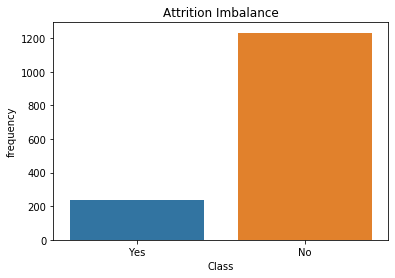

In [3]:
#Data Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt

#Visualization of the distribution of target variable
sns.countplot(IBMData["Attrition"])
plt.xlabel("Class")
plt.ylabel("frequency")
plt.title("Attrition Imbalance")

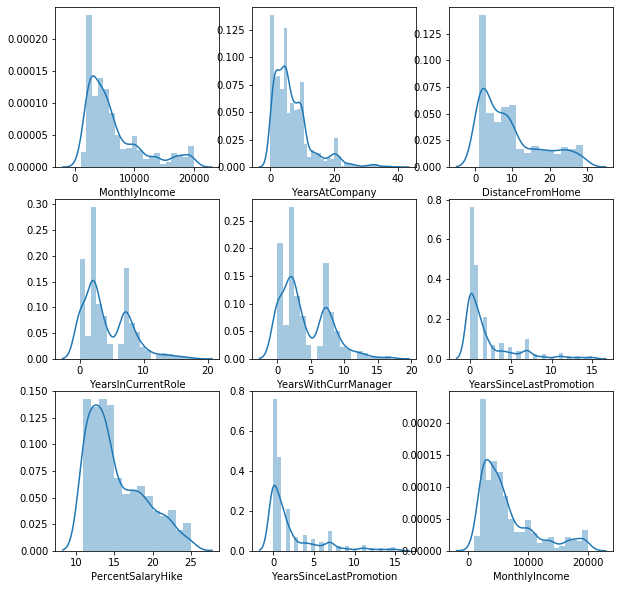

In [8]:
#Display multiple distribution plots
fig,ax = plt.subplots(3,3, figsize=(10,10)) 
sns.distplot(IBMData['MonthlyIncome'], ax = ax[0,0]) 
sns.distplot(IBMData['YearsAtCompany'], ax = ax[0,1]) 
sns.distplot(IBMData['DistanceFromHome'], ax = ax[0,2]) 
sns.distplot(IBMData['YearsInCurrentRole'], ax = ax[1,0]) 
sns.distplot(IBMData['YearsWithCurrManager'], ax = ax[1,1]) 
sns.distplot(IBMData['YearsSinceLastPromotion'], ax = ax[1,2]) 
sns.distplot(IBMData['PercentSalaryHike'], ax = ax[2,0]) 
sns.distplot(IBMData['YearsSinceLastPromotion'], ax = ax[2,1]) 
sns.distplot(IBMData['MonthlyIncome'], ax = ax[2,2]) 
plt.show()

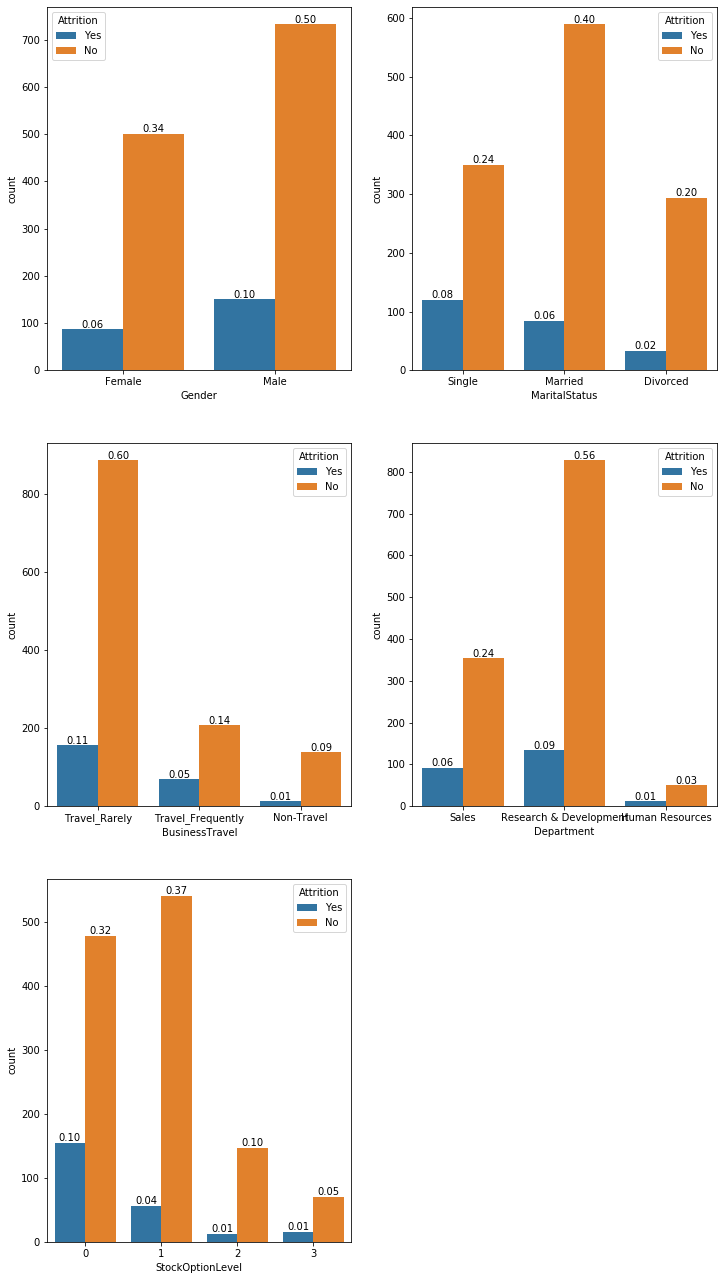

In [6]:
#multiple count plots
IBMData['TotalSatisfaction'] = IBMData.loc[:, ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                                              'RelationshipSatisfaction','WorkLifeBalance']].sum(axis=1)
total_records= len(IBMData)
columns = ["Gender","MaritalStatus","BusinessTravel","Department","StockOptionLevel"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    
    ax1 = sns.countplot(data=IBMData,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

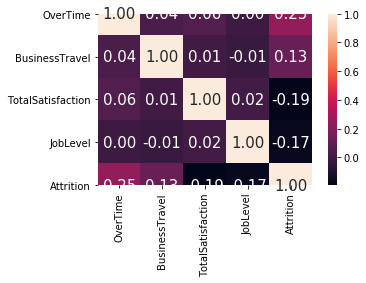

In [9]:
###Correlation Matrix
import numpy as np

IBMData['Attrition'] = IBMData['Attrition'].map({'Yes': 1, 'No': 0})
IBMData['BusinessTravel'] = IBMData['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
IBMData['MaritalStatus'] = IBMData['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
IBMData['OverTime'] = IBMData['OverTime'].map({'No': 0, 'Yes': 1})

cols = ['OverTime','BusinessTravel','TotalSatisfaction','JobLevel','Attrition']

cm = np.corrcoef(IBMData[cols].values.T) # Return Pearson product-moment correlation coefficients

# sns.set(font_scale=1.5)
# Heatmap visualisation of pearson correlation coefficients
# Documentation https://seaborn.pydata.org/generated/seaborn.heatmap.html
hm = sns.heatmap(cm,                # Plot rectangular data as a color-encoded matrix
                 cbar=True,         # Whether to draw a colorbar.
                 annot=True,        # If True, write the data value in each cell.
                 square=True,       # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 fmt='.2f',         # String formatting code to use when adding annotations.
                 annot_kws={'size': 15}, # Keyword arguments for ax.text when annot is True
                 yticklabels=cols,  # If True, plot the column names of the dataframe.
                 xticklabels=cols)

plt.tight_layout()
# plt.savefig('correlation_coefficient.png', dpi=300) # Saves the figure in our local disk
plt.show()

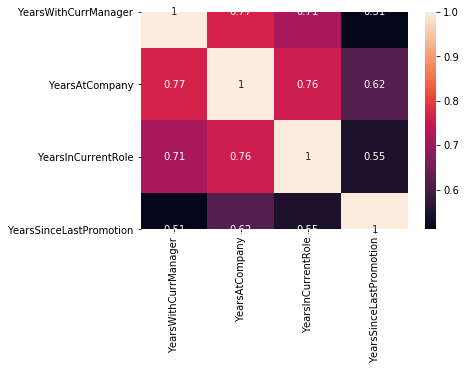

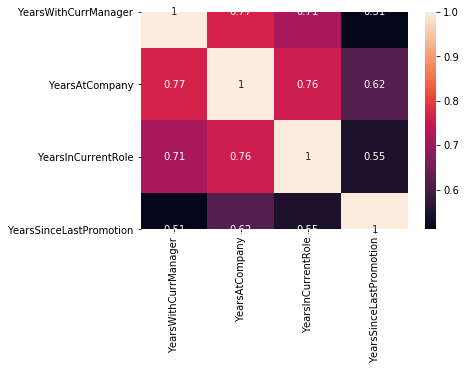

In [10]:
IBMData2 = pd.DataFrame(IBMData,columns=['YearsWithCurrManager','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion'])
IBMData2.corr()
IBMData2 = pd.DataFrame(IBMData,columns=['YearsWithCurrManager','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion'])
corrMatrix = IBMData2.corr()

sns.heatmap(corrMatrix, annot=True)
plt.show()
################################
IBMData2 = pd.DataFrame(IBMData,columns=['YearsWithCurrManager','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion'])
corrMatrix = IBMData2.corr()

sns.heatmap(corrMatrix, annot=True)
plt.show()
